# SC1015 Project

# Introduction

### Presented by Group 4: 

> Cai Xu Bin, U2320538H  
> Tan Wei Jin Ranen, U2320710A  
> Austin Teo Yuan Xuan, U2310167H

### Importing Essential Libraries

We began by importing the essential Python Libraries and modules from Scikit-Learn for our regression.

> NumPy : Library for Numeric Computations in Python   
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Scikit-Learn: Library for Machine Learning in Python  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression #module for linear regression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,\
mean_absolute_error, mean_squared_error, r2_score #modules to evaluate different models
from sklearn.model_selection import train_test_split, GridSearchCV# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor #modules for decision tree, random forest and decision tree regressor
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier model from Scikit-Learn
import warnings #to reduce warning
sb.set() # set the default Seaborn style for graphics

## Importing Dataset
 Dataset on Mobile Phone Specifications and Prices
 > Link to Dataset on Kaggle:   
 > https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices

In [2]:
data = pd.read_csv('data.csv')
data.head() #to view if the correct dataset has been imported

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


### Description of the dataset

> **Unnamed:0**: Sequential Id of the phone  
> **Name**: Name of the phone  
> **Brand**: Brand name of the phone  
> **Model**: Model of the phone  
> **Battery Capacity (mAh)**: Battery Capacity of the phone in milliampere-hour  
> **Screensize(inches)**: Screen size in inches across opposite corners  
> **Touchscreen**: Whether the phone is touchscreen supported or not  
> **Resolution x**: The resolution of the phone along the width of the screen  
> **Resolution y**: The resolution of the phone along the height of the screen  
> **Processor**: Number of processor cores  
> **RAM (MB)**: RAM available in phone in MB  
> **Internal Storage (GB)**: Internal Storage of phone in GB  
> **Rear Camera**: Resolution of rear camera in MP (0 if unavailable)  
> **Front Camera**: Resolution of front camera in MP (0 if unavailable)  
> **Operating system**: OS used in the phone  
> **Wi-Fi**: Whether the phone has WiFi functionality  
> **Bluetooth**: Whether the phone has bluetooth functionality  
> **GPS**: Whether the phone has GPS functionality  
> **Number of SIMs**: Number of SIM card slots in the phone  
> **3G**: Whether the phone has 3G network functionality  
> **4G/LTE**: Whether the phone has 4G/LTE network functionality  
> **Price**: Price of the phone in INR  


We then check the shape of the dataset and the types of the variables

In [3]:
#Visualise shape of the dataset and see the columns
print("Data dimensions : ", data.shape)
data.info()

Data dimensions :  (1359, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating 

We can make some observations from a quick glance of information on the dataset after dropping the first column, as above.
There are **22** variables/features/columns and **1359** observations/samples/rows in the dataset.
There are **4** variables identified as float64 by default, and **7** variables identified as int64 by default. **8** variables are objects.

# -----------------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------


# Data Cleaning Stage 1

### Renaming Columns
We renamed the columns for ease of reference in text and calling in functions

In [4]:
#a dictionary to map the current column name to desired column name
column_rename_dict = {
    'Name': 'name',
    'Brand': 'brand',
    'Model': 'model',
    'Battery capacity (mAh)': 'battery_capacity',
    'Screen size (inches)': 'screen_size',
    'Touchscreen': 'touchscreen',
    'Resolution x': 'resolution_x',
    'Resolution y': 'resolution_y',
    'Processor': 'processor',
    'RAM (MB)': 'ram',
    'Internal storage (GB)': 'internal_storage',
    'Rear camera': 'rear_camera',
    'Front camera': 'front_camera',
    'Operating system': 'operating_system',
    'Wi-Fi': 'wifi',
    'Bluetooth': 'bluetooth',
    'GPS': 'gps',
    'Number of SIMs': 'dual_sim',
    '3G': '3g',
    '4G/ LTE': '4g',
    'Price': 'price'
}


data_renamed= data.rename(columns=column_rename_dict)

data_renamed.head()

,Unnamed: 0,name,brand,model,battery_capacity,screen_size,touchscreen,resolution_x,resolution_y,processor,...,rear_camera,front_camera,operating_system,wifi,bluetooth,gps,dual_sim,3g,4g,price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


We check if there are any duplicate data points

In [5]:
#checking if there are any duplicated data points
duplicate_rows = data_renamed.duplicated() #check if theres duplicates
if duplicate_rows.any():  #if theres duplicates then run following suite
    print("There are duplicate rows.")
else: #else run the following suite
    print("There are no duplicate rows.")

There are no duplicate rows.


### Removing Unneccessary Data

After viewing the description of the columns of data, we decided to remove the columns that were not useful for our analysis.

The unnamed column can be dropped as it does not consist of anything meaningful. 

In [6]:
data_renamed=data_renamed.drop(data.columns[0], axis=1) #dropping first column

Since modern phones almost always have Wi-Fi, touchscreen, bluetooth and GPS, we will remove the data points without these features to make the data analysis more relevant and then remove the columns entirely as they are no longer relevant to our regression. This is also feasible as the outliers from the data which do not have these features only make up a small portion of the data (137 points). The name, brand and model of the phone with be removed as it is not a part of the specifications of the phone. We are only concerned with how the specifications and features of the phone affects price.

In [7]:
#dropping the rows without GPS, Wi-Fi, touchscreen, bluetooth.
data_renamed = data_renamed.drop(data_renamed[(data_renamed['gps'] == "No") | (data_renamed['wifi'] == "No")|(data_renamed['bluetooth'] == "No") | (data_renamed['touchscreen'] == "No")].index)

#dropping columns of GPS, Wi-Fi, touchscreen, bluetooth.
data_dropped= data_renamed.drop(columns=["gps", "wifi","bluetooth", "touchscreen", "name", "brand", "model"])

#see the new data
print("the data has", data_dropped.shape, "rows and columns respectively.")
data_dropped.head()

the data has (1222, 14) rows and columns respectively.


,battery_capacity,screen_size,resolution_x,resolution_y,processor,ram,internal_storage,rear_camera,front_camera,operating_system,dual_sim,3g,4g,price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,Android,2,Yes,Yes,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,Android,2,Yes,Yes,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,iOS,2,Yes,Yes,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,iOS,2,Yes,Yes,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,Android,1,No,No,49990


### Converting Number of Sims to Categorical

For the Predictor Variable 'Number of SIMs', as there are only two unique values (1 or 2), we decided to change it to a categorical variable to better see the relationship between this Predictor Variable and the Response Variable, 'price'.

In [8]:
#to change number of sim to categorical
mapping = {1: 'Yes', 2: 'No'}

# Map the values using the dictionary
data_dropped['dual_sim'] = data_dropped['dual_sim'].map(mapping)

In [9]:
data_dropped.info() #viewing remaining data number and column

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 0 to 1358
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_capacity  1222 non-null   int64  
 1   screen_size       1222 non-null   float64
 2   resolution_x      1222 non-null   int64  
 3   resolution_y      1222 non-null   int64  
 4   processor         1222 non-null   int64  
 5   ram               1222 non-null   int64  
 6   internal_storage  1222 non-null   float64
 7   rear_camera       1222 non-null   float64
 8   front_camera      1222 non-null   float64
 9   operating_system  1222 non-null   object 
 10  dual_sim          1222 non-null   object 
 11  3g                1222 non-null   object 
 12  4g                1222 non-null   object 
 13  price             1222 non-null   int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 143.2+ KB


Thus the remaining 14 columns consists of:

> 9 Numerical `Predictors`: 'battery_capacity', 'screen_size', 'resolution_x', 'resolution_y', 'processor', 'ram', 'internal_storage', 'rear_camera' and 'front_camera'.  
>
> 4 Categorical `Predictors`: 'operating system', 'dual_sim', '3g' and '4g'  
>
> 1 `Response` : 'price'

# -----------------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------


# Exploratory Data Analysis Stage 1 and Data Cleaning Stage 2

We first split data into numerical predictors, categorical predictors and the response variable.

In [10]:
#Numeric Predictors
num_data = data_dropped[['battery_capacity', 'screen_size', 'resolution_x', 'resolution_y', 'processor', \
                 'ram', 'internal_storage', 'rear_camera', 'front_camera']]
num_data.describe()

,battery_capacity,screen_size,resolution_x,resolution_y,processor,ram,internal_storage,rear_camera,front_camera
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,2950.819967,5.310540,823.198854,1514.806056,5.598200,2521.388707,30.951090,12.210966,7.160884
std,859.292226,0.639793,272.700354,559.445387,2.175306,1658.099496,36.679738,8.884221,6.402493
min,1050.000000,2.600000,240.000000,320.000000,1.000000,256.000000,0.160000,0.000000,0.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.200000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,13.000000,5.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000


In [11]:
#Categorical Predictors
cat_data=data_dropped[["3g", "4g", "operating_system","dual_sim"]]
cat_data.describe()

,3g,4g,operating_system,dual_sim
count,1222,1222,1222,1222
unique,2,2,7,2
top,Yes,Yes,Android,No
freq,1116,926,1168,1024


In [12]:
#Response Variable
response_rupee=data_dropped[["price"]]
response_rupee.describe()

,price
count,1222.000000
mean,11857.474632
std,14236.901086
min,494.000000
25%,4899.250000
50%,7360.500000
75%,12875.000000
max,174990.000000


## Cleaning Response Variable: Price

### Exploration
We begin by exploring the details of the reponse variable, `price`

Number of outliers: price    124
dtype: int64


,price
count,1222.000000
mean,11857.474632
std,14236.901086
min,494.000000
25%,4899.250000
50%,7360.500000
75%,12875.000000
max,174990.000000


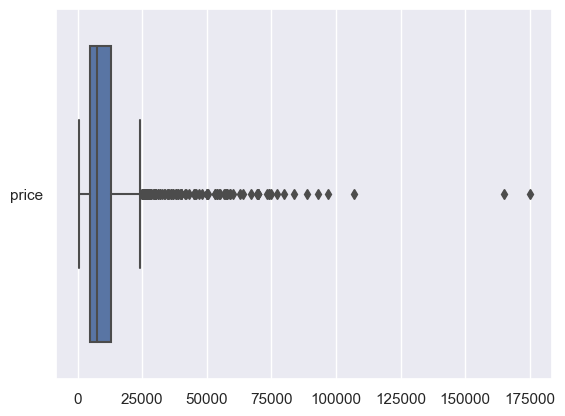

In [13]:
#Explore response variable price

# Calculate quartiles and IQR
Q1 = response_rupee.quantile(0.25)
Q3 = response_rupee.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = np.sum((response_rupee < lower_bound) | (response_rupee > upper_bound))
print("Number of outliers:", outliers_count)
#to visualise the distribution of response variable using boxplot
sb.boxplot(data = response_rupee, orient='h')
response_rupee.describe()

We can see that the price range has a high variance, with the highest price being 174,990 rupees, the lowest being 494 rupees and a standard deviation of ~14237 rupees. The median is 4899 rupees which corresponds to about 80 SGD, which is extremely low for a smartphone as compared to what is available in Singapore. The reason for the low median is the low gdp percapita per year in india at only 2,410.89 USD. Nonetheless, there will be expensive phones such as Samsung and Apple which would be an outlier in this dataset. We will not be removing these outliers as these phone would come with different specs which is relevant to our analysis. 

### Changing currency of price

To make data more easily interpreted in Singapore's context, we will change it to SGD.

In [14]:
Sgd_Rupee_rate = 61.24 #can be changed if necessary, as of 21 apr 2024
response_sgd= pd.DataFrame([]) #creating a place holder for new dataframe so it does not alter orginal response
response_sgd["price"] = (response_rupee["price"] / Sgd_Rupee_rate).round(2) #converted and rounded to 2dp
response_sgd.head() 

,price
0,963.39
1,457.20
2,1745.59
3,1027.11
4,816.30


## Cleaning Numerical Predictors using correlation with Response Variable: Price

We will look at correlation coefficient of the numerical predictors with price. The variables with a low correlation coefficient are unhelpful as predictors and hence can be removed.

In [15]:
num_data_with_price = pd.concat([num_data, response_sgd], axis=1) #concatenate the numerical data with price
corr_matrix= num_data_with_price.corr() #generating correlation matrix

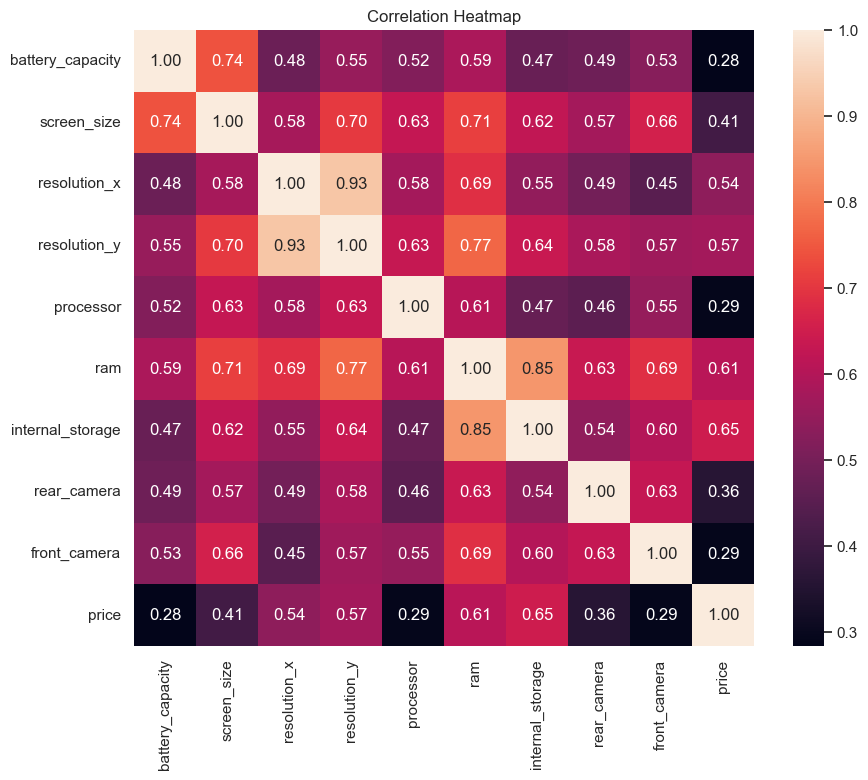

In [16]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix, we can see that screen size, resolution_x, resolution_y, ram, internal_storage rear_camera, positively correlates with price with a correlation coefficient above 0.3 (This value is chosen as variables with a correlation lower than 0.3 are usually considered to have little correlation). The rest of the factors have a lower correlation coefficient with price, hence they are poor predictors of the response variable "price" and we can thus drop these columns. Since resolution_x and resolution_y has extremely high correlation coefficient with each other, we will drop resolution_x which has a slightly lower correlation coefficient with price to prevent multi-collinearity.

In [17]:
#dropping columns of numerical predictor
num_data_cleaned=num_data.drop(columns=["resolution_x", "battery_capacity", "processor",\
                                         "front_camera"])
num_data_cleaned.head() #to see the first few rows of the cleaned numerical predictor

,screen_size,resolution_y,ram,internal_storage,rear_camera
0,6.67,3120,12000,256.0,48.0
1,6.50,2400,6000,64.0,64.0
2,6.50,2688,4000,64.0,12.0
3,6.10,1792,4000,64.0,12.0
4,6.40,2340,6000,128.0,12.0


## Cleaning the categorical predictors

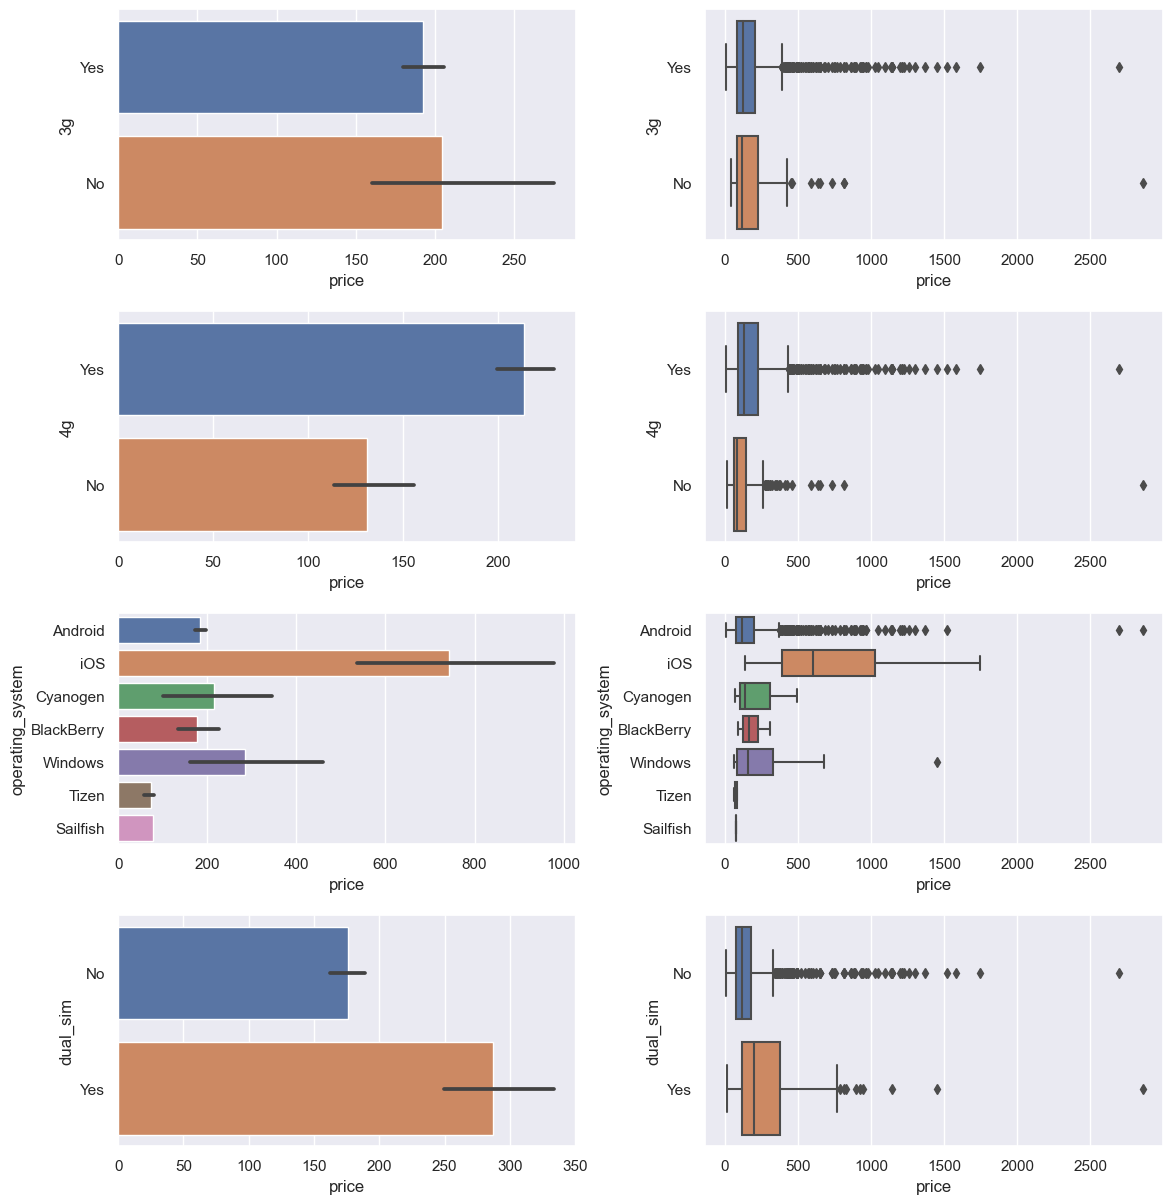

In [18]:
#we investigate the relationship between price and the different categories
cat_data_with_price = pd.concat([cat_data, response_sgd], axis=1)
f, axes = plt.subplots(4, 2, figsize=(12, 12))
j=0
for column in cat_data_with_price:
    sb.barplot(x = "price", y = column, data = cat_data_with_price, ax=axes[j,0])
    sb.boxplot(x = "price", y = column, data = cat_data_with_price, ax=axes[j,1])
    j+=1
    
    if j==4: #this is to prevent looping the column of "price"
        break 
    
    warnings.filterwarnings("ignore")
    plt.tight_layout()  # Adjust spacing between subplots

From the bar and box plot we can see that the mean, median and spread of price is similar for phones with 3g and without 3g, hence we will drop the "3g" variable as a predictor. We will also convert the categorical data into dummies to be used later.

In [19]:
cat_data_dropped=cat_data.drop(columns=["3g"]) #dropping 3g column
cat_data_dummy=pd.get_dummies(cat_data_dropped, columns=["4g", "dual_sim", "operating_system"])# converting to dummy
cat_data_dummy.head()

,4g_No,4g_Yes,dual_sim_No,dual_sim_Yes,operating_system_Android,operating_system_BlackBerry,operating_system_Cyanogen,operating_system_Sailfish,operating_system_Tizen,operating_system_Windows,operating_system_iOS
0,False,True,True,False,True,False,False,False,False,False,False
1,False,True,True,False,True,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,True,True,False,False,False,False,False,False,False,True
4,True,False,False,True,True,False,False,False,False,False,False


We need to drop some variables to prevent multicolinearity because columns such as 4g_Yes and 4g_No would be highly correlated with each other. As for operating systems, one column needs to be dropped. If a data point has False for all columns of the operating systems that would mean that data has the operating system that is dropped.

In [20]:
cat_data_cleaned=cat_data_dummy.drop(columns=["4g_No","dual_sim_No", "operating_system_Cyanogen"]) #dropping the variables
cat_data_cleaned.head()

,4g_Yes,dual_sim_Yes,operating_system_Android,operating_system_BlackBerry,operating_system_Sailfish,operating_system_Tizen,operating_system_Windows,operating_system_iOS
0,True,False,True,False,False,False,False,False
1,True,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,True
4,False,True,True,False,False,False,False,False


## Final Cleaned Dataset

In [21]:
cleaned_data = pd.concat([num_data_cleaned, cat_data_cleaned, response_sgd], axis=1)
cleaned_data.head()

,screen_size,resolution_y,ram,internal_storage,rear_camera,4g_Yes,dual_sim_Yes,operating_system_Android,operating_system_BlackBerry,operating_system_Sailfish,operating_system_Tizen,operating_system_Windows,operating_system_iOS,price
0,6.67,3120,12000,256.0,48.0,True,False,True,False,False,False,False,False,963.39
1,6.50,2400,6000,64.0,64.0,True,False,True,False,False,False,False,False,457.20
2,6.50,2688,4000,64.0,12.0,True,False,False,False,False,False,False,True,1745.59
3,6.10,1792,4000,64.0,12.0,True,False,False,False,False,False,False,True,1027.11
4,6.40,2340,6000,128.0,12.0,False,True,True,False,False,False,False,False,816.30


# -----------------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------


# EDA of cleaned data

## Response Variable

,price
count,1222.000000
mean,193.623101
std,232.477226
min,8.070000
25%,80.002500
50%,120.195000
75%,210.240000
max,2857.450000


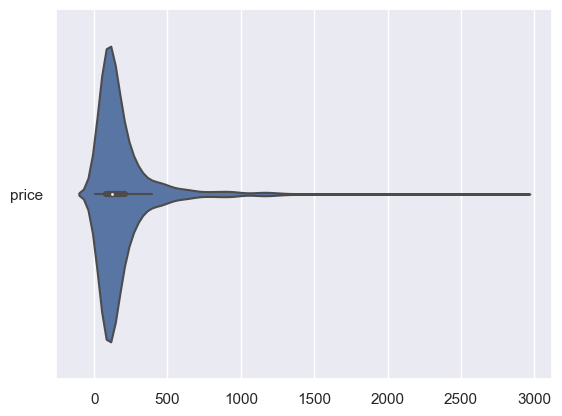

In [22]:
sb.violinplot(data = response_sgd, orient='h')
response_sgd.describe()

The plot is the same as before, but this plot is in SGD.

# -----------------------------------------------------------------------------------------


## Predictor Variables

We will explore the details of the Numerical and Categorical variables seperately.

### Visualisation of Predictor Variable Distribution

### Numerical Variables
Now, we will explore the individual predictors and their distribution, starting first with the numerical predictors.

We decided to use boxplots and histograms to visualise the distribution of the numerical predictor variables.

### Boxplots and histogram

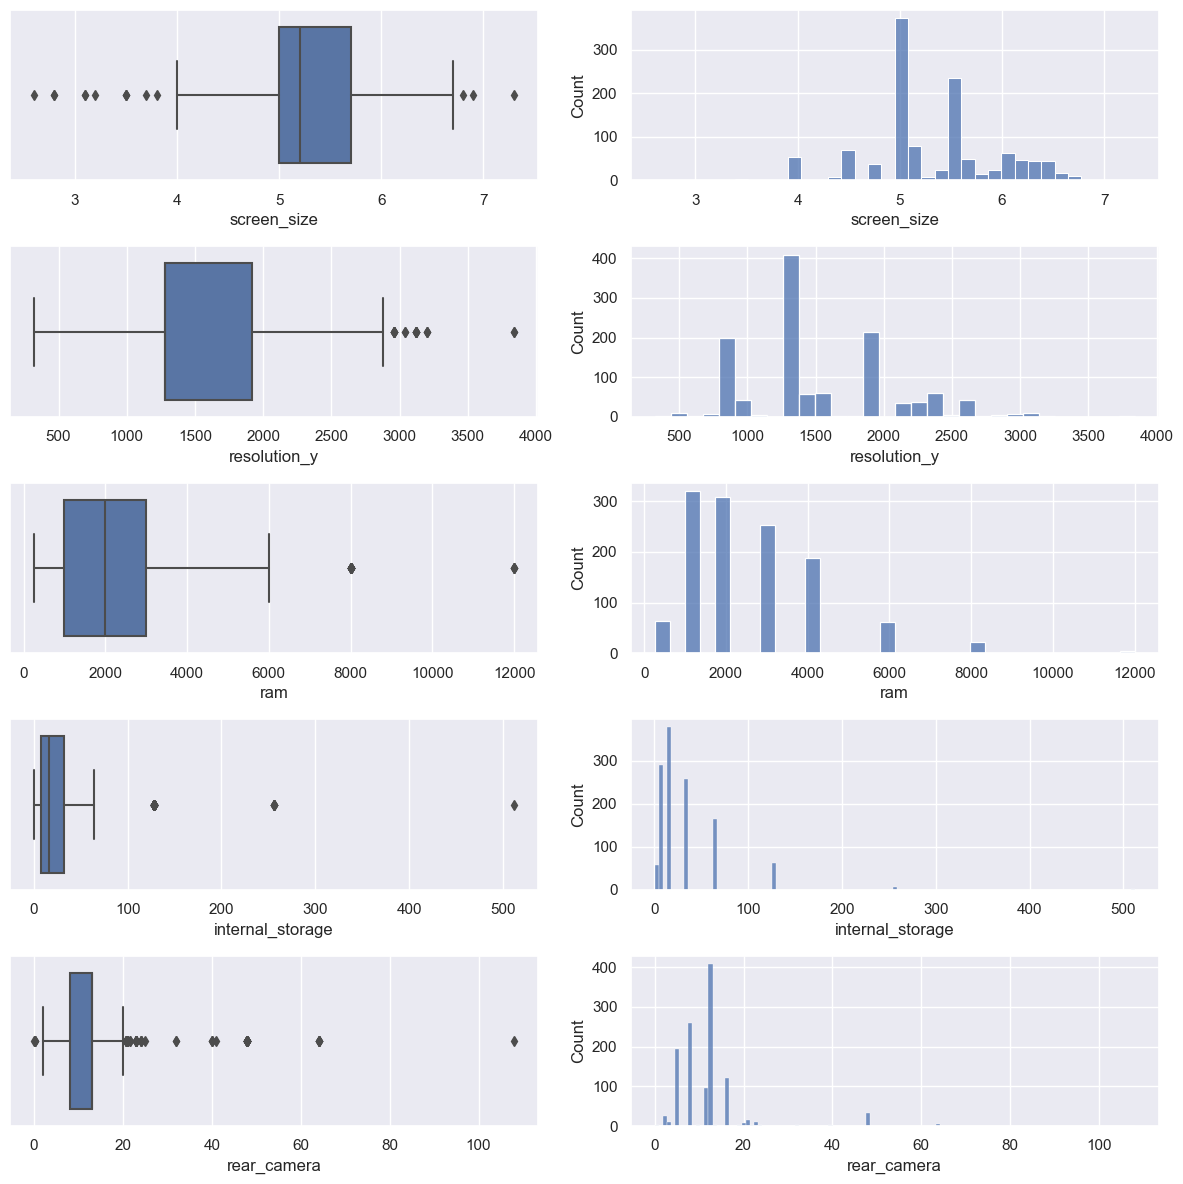

In [23]:

#plotting all box plots and histograms for all numerical variables for overview
f, axes = plt.subplots(5, 2, figsize=(12, 12))
j=0
for column in num_data_cleaned:
    sb.boxplot(data = num_data_cleaned, x= column, orient = "h", ax = axes[j,0])
    sb.histplot(data = num_data_cleaned, x= column, ax = axes[j,1])
    j+=1

plt.tight_layout()  # Adjust spacing between subplots

### Individual Plots of Numerical Variables

#### Screen Size

<Axes: xlabel='screen_size', ylabel='Count'>

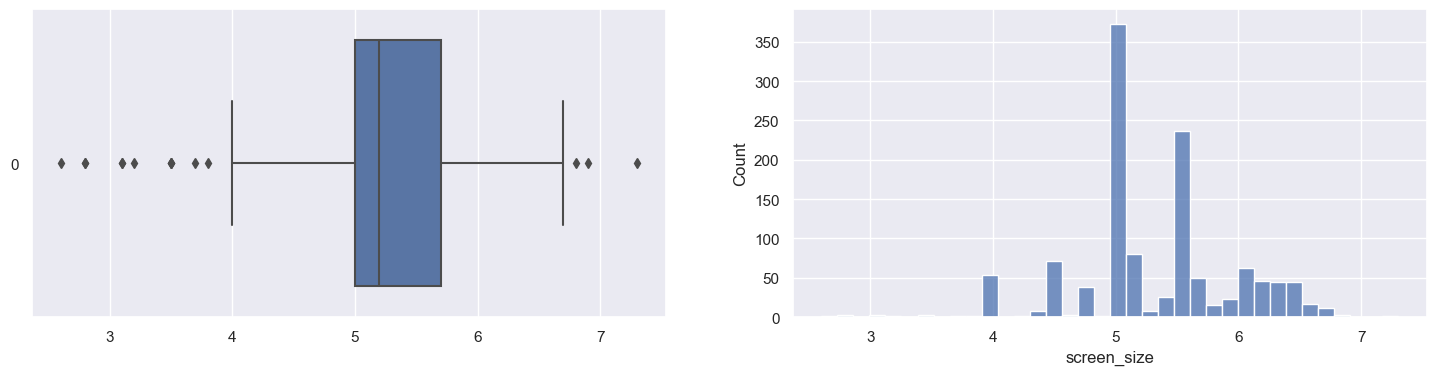

In [24]:
#Plot Boxplot and Histogram to show predictor screen_size
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = num_data_cleaned['screen_size'], orient = "h", ax = axes[0])
sb.histplot(data = num_data_cleaned['screen_size'], ax = axes[1])

Form the plots, we can see that the screen size of the mobile phones are mostly at least 5 inches, indicating the general build and size that we can expect to see for a mobile phone.

#### Resolution Y

<Axes: xlabel='resolution_y', ylabel='Count'>

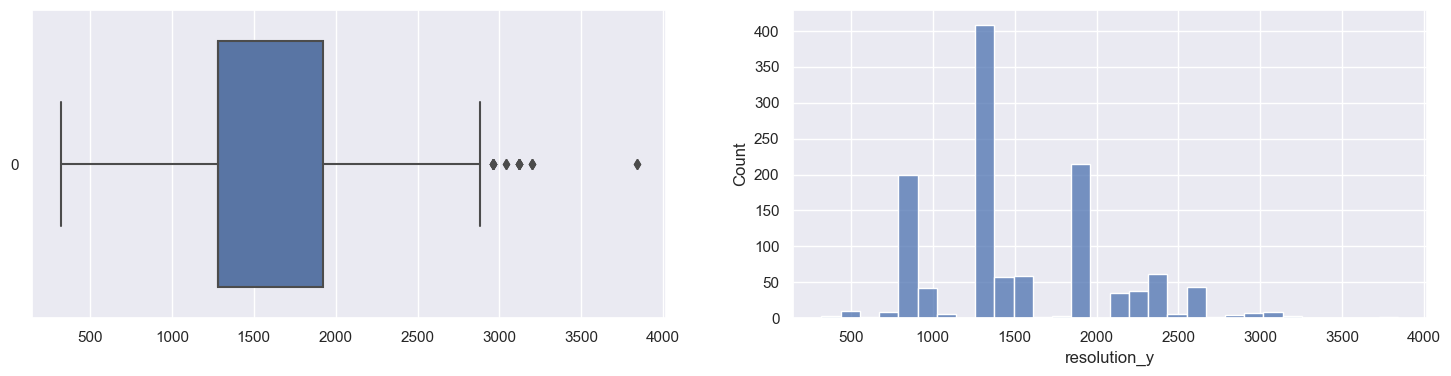

In [25]:
#Plot Boxplot and Histogram to show predictor resolution_y
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = num_data_cleaned['resolution_y'], orient = "h", ax = axes[0])
sb.histplot(data = num_data_cleaned['resolution_y'], ax = axes[1])

From the plots, we can see that the majority of resolution Y is around 1500.

#### Ram

<Axes: xlabel='ram', ylabel='Count'>

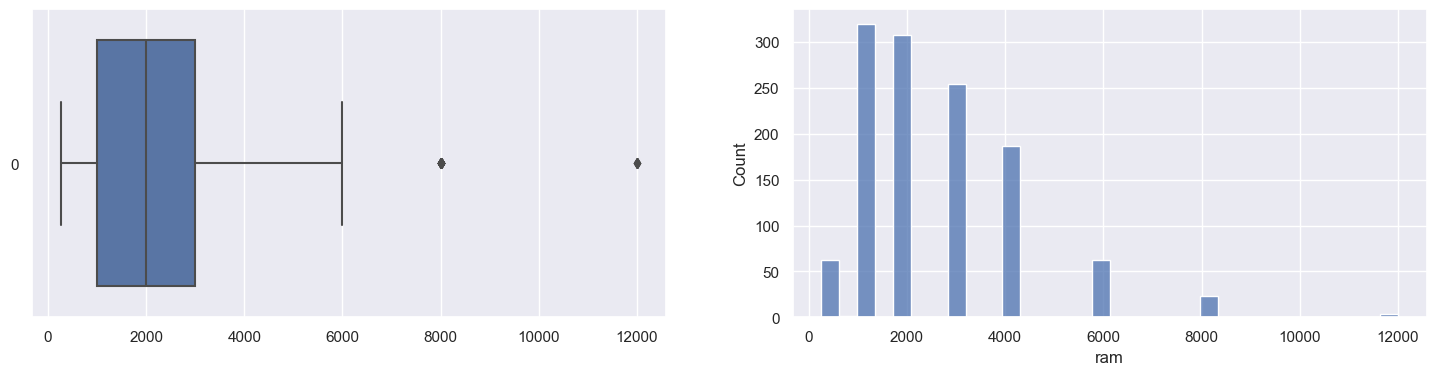

In [26]:
#Plot Boxplot and Histogram to show predictor ram
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = num_data_cleaned['ram'], orient = "h", ax = axes[0])
sb.histplot(data = num_data_cleaned['ram'], ax = axes[1])

From the plots, we can see that the RAM mostly ranges between 1000-4000MB, and there are a few outliers with a large amount of RAM, at 8000 and 12000MB of higher-end phones.

#### Internal Storage

<Axes: xlabel='internal_storage', ylabel='Count'>

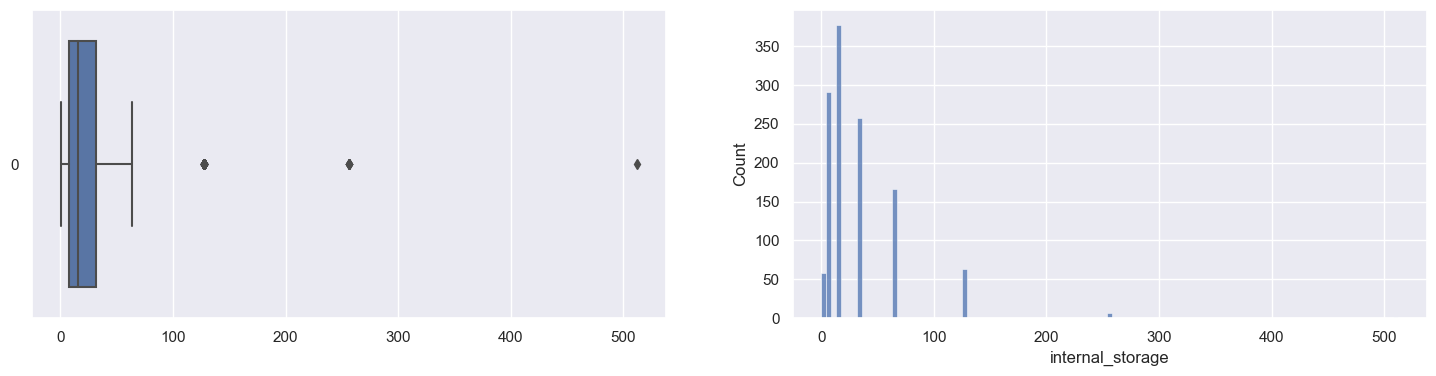

In [27]:
#Plot Boxplot and Histogram to show predictor internal_storage
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = num_data_cleaned['internal_storage'], orient = "h", ax = axes[0])
sb.histplot(data = num_data_cleaned['internal_storage'], ax = axes[1])

From the plots, we can see that internal storage of mobile phones are generally distributed quite narrowly, ranging around 64GB. However, there are some phones that are boasting more than 100GB of internal storage.

#### Rear Camera

<Axes: xlabel='rear_camera', ylabel='Count'>

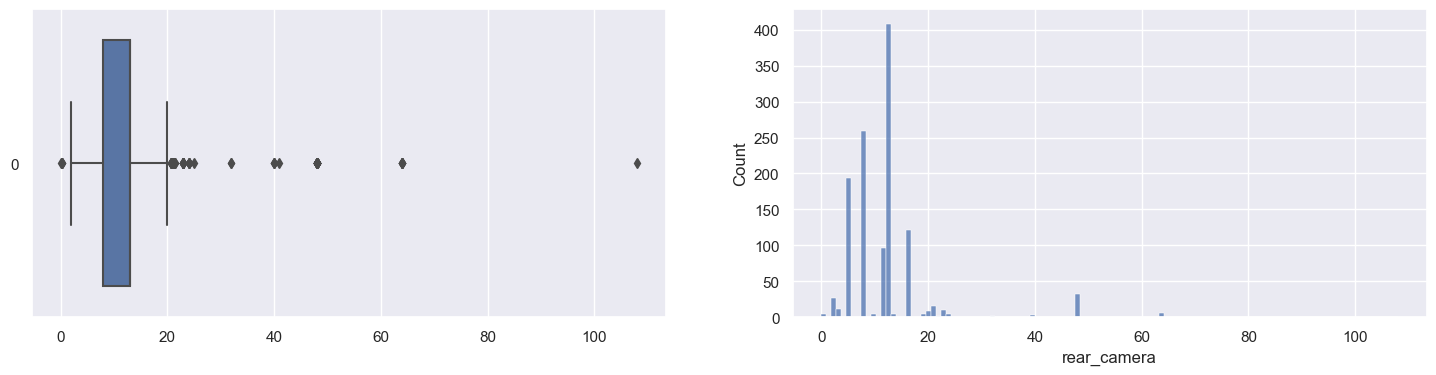

In [28]:
#Plot Boxplot and Histogram to show predictor rear_camera
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = num_data_cleaned['rear_camera'], orient = "h", ax = axes[0])
sb.histplot(data = num_data_cleaned['rear_camera'], ax = axes[1])

From the plots, we can see that rear camera are generally between 8-16megapixel, while there are some outliers with extremely high megapixel

# -----------------------------------------------------------------------------------------


## Categorical Variables

We decided to plot the distribution of the categorical variables using countplot, to show the frequency of each possible value in each category

From the Categorical Predictors, we can see that they all have 2 unique values, as these predictors are checking whether they `have` or `do not have` the said feature. It can be also noted that the majority of mobile phones have all the features, except for 'dual_sim', where contrarily, the majority do not have dual sim capabilities. 

### Countplots

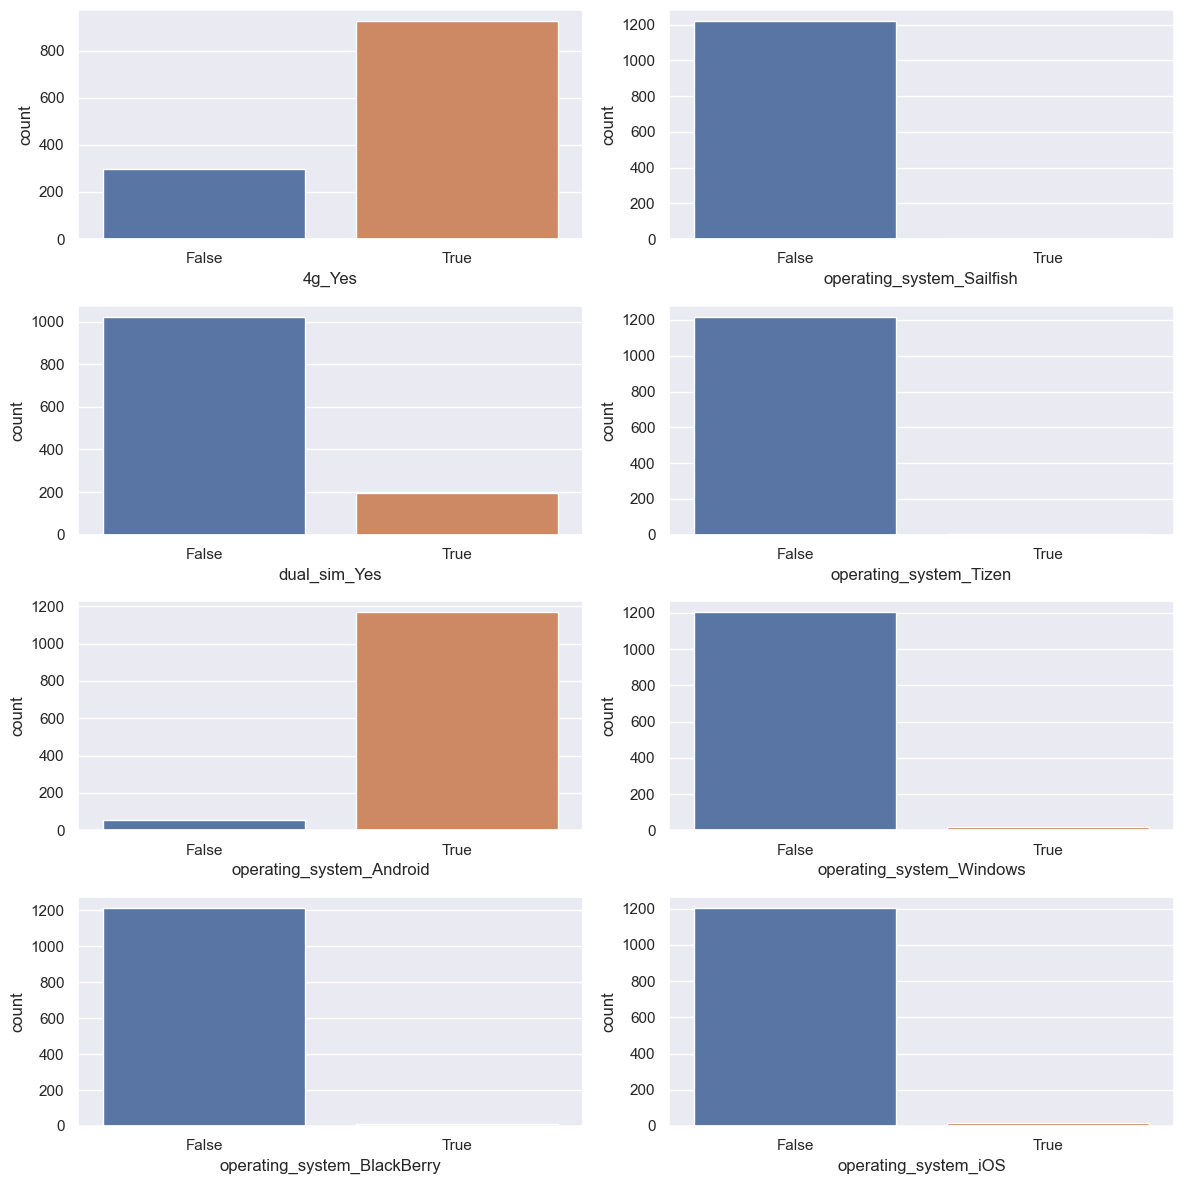

In [29]:
#plotting all countplot for overview
f, axes = plt.subplots(4, 2, figsize=(12, 12))
a=0
b=0
j=0
for column in cat_data_cleaned:
    if j<=3:
        a = 0
        b = j
    else:
        a = 1
        b = j-4
    sb.countplot(data = cat_data_cleaned, x= column, ax = axes[b,a])
    j+=1
    plt.tight_layout()  # Adjust spacing between subplots

It can be observed that majority of them are andriod system, which is of no surprise as most phones on the market uses andriod. There are little IOS system, as we all know, IOS system phones are iPhones, which are more expensive, hence we can expect these phones to have higher price.

### Individual CountPlots of Categorical Variables for 4g_Yes and dual_sim_Yes

#### 4G/LTE

<Axes: xlabel='4g_Yes', ylabel='count'>

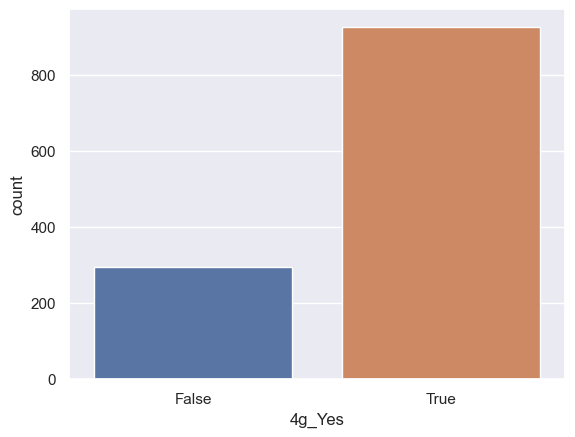

In [30]:
# Whether a mobile has 4G
sb.countplot(data = cat_data_cleaned, x= "4g_Yes")

Majority of the phones have 4g, which is of no surprise these days.

#### Dual Sim

<Axes: xlabel='dual_sim_Yes', ylabel='count'>

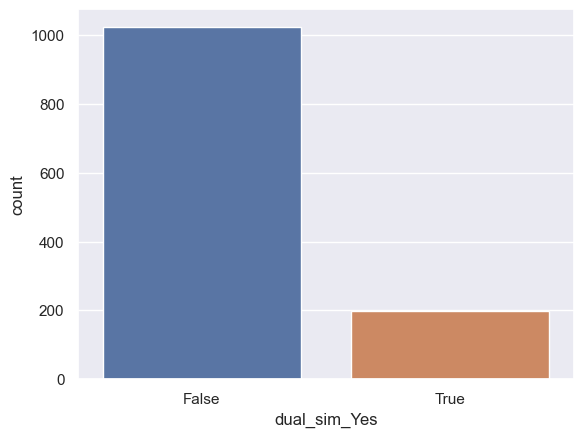

In [31]:
# Whether a mobile has dual sim
sb.countplot(data = cat_data_cleaned, x= "dual_sim_Yes")

About 1/6 of the phones has dual sim. 

# -----------------------------------------------------------------------------------------


### Visualisation of Predictor-Response relationship for numerical data

We decided to use scatterplots to visualise the relationship between the predictor variables and the reponse varaiable `'price'`

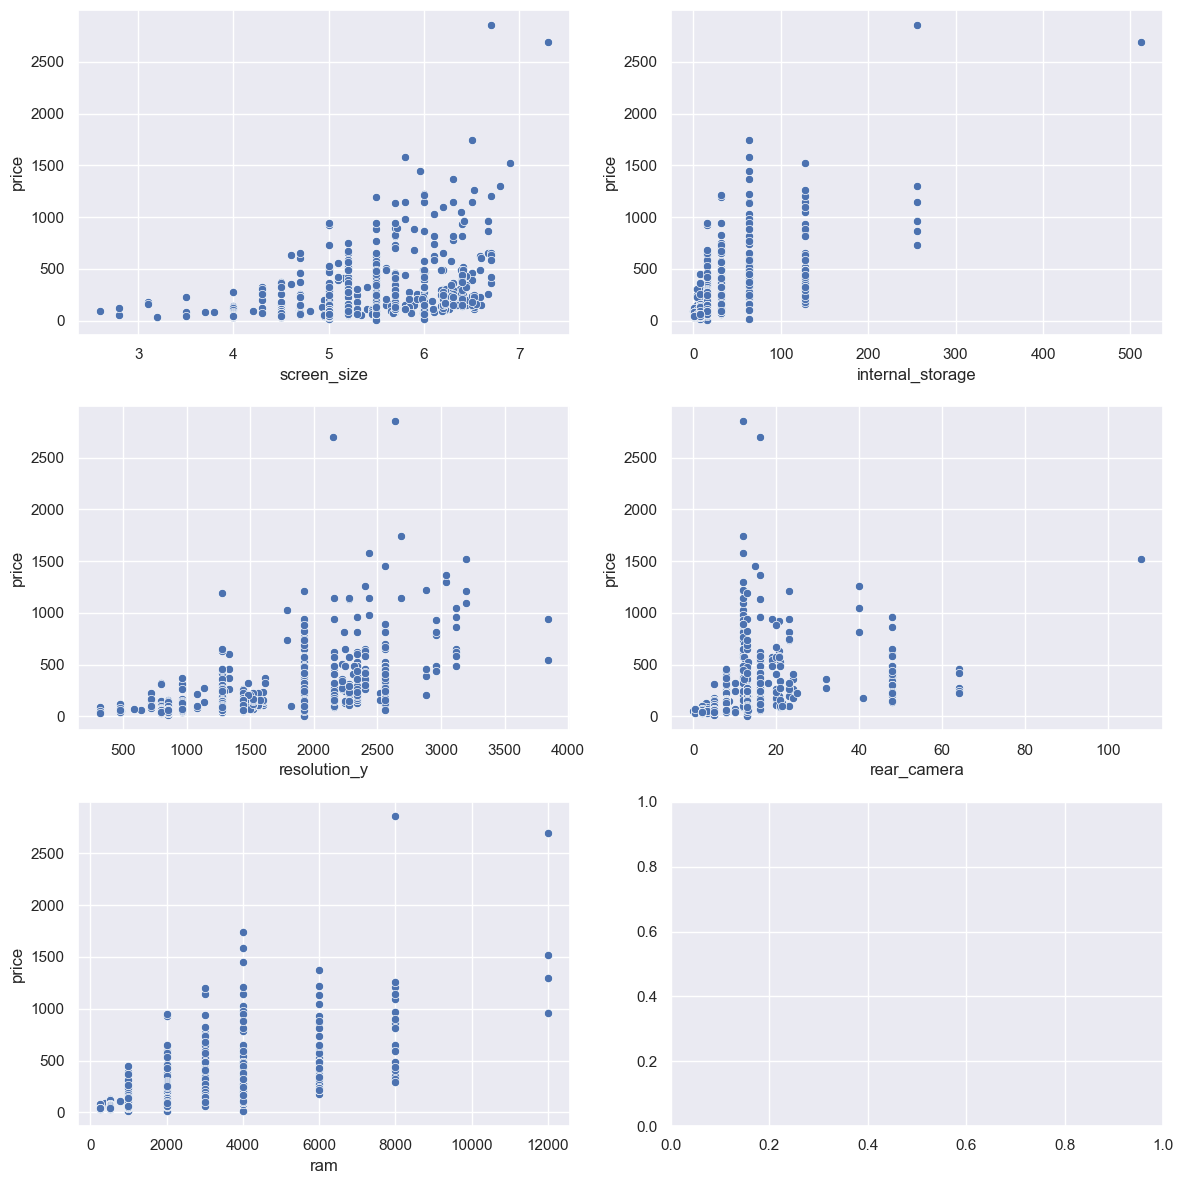

In [32]:
#plotting all scatterplot against different price for overview
f, axes = plt.subplots(3, 2, figsize=(12, 12))
a=0
b=0
j=0

for column in num_data_cleaned:
    if j<=2:
        a = 0
        b = j
    else:
        a = 1
        b = j-3
    
    
    sb.scatterplot(x=num_data_cleaned[column], y=response_sgd["price"], ax = axes[b,a])
    j+=1
    
    warnings.filterwarnings("ignore")
    plt.tight_layout()  # Adjust spacing between subplots

From the scatterplots, we can see that for the same value of the numerical predictor variable, there is a wide range of phone prices. For example, at 4000MB of RAM, the priceranges from near 0 to about 1750 SGD. This applies to the other predictors as well. However, this is not surprising as we know the price of a phone is not affected by a single factor. A phone with 4000MB of RAM can have a very low internal storage, causing it to be cheap or vice versa.

# -----------------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------


# Machine Learning Models

We will be implementing two types of models. Regression models to predict the exact value of the mobile phone based on the specifications and Classifications models to predict the price range categories.

### Preparing data: Response and Predictor

In [33]:
predictor=pd.concat([num_data_cleaned, cat_data_cleaned], axis=1) #for predictor

In [34]:
response= response_sgd

### Splitting data into train test split

The same data split will be used to ensure that a higher accuracy is not due to the data being splitted differently

In [35]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.25, random_state= 42)

To implement decision tree and random forest, we convert price to categories, 

Low (SGD0-SGD80.0025)

Medium(SGD80.0025- SGD120.195)

High(SGD120.195-SGD210.24)

Very High(>SGD210.24)



In [36]:
price_bins = [0, 80.2500, 120.195000, 210.240000, float('inf')]

labels = ["Low", "Medium", "High", "Very High"]

y_cat_train = pd.DataFrame([])
y_cat_test = pd.DataFrame([])
# Apply binning
y_cat_train["cat_price"] = pd.cut(y_train["price"], bins=price_bins, labels=labels)
y_cat_test["cat_price"] = pd.cut(y_test["price"], bins=price_bins, labels=labels)

# -----------------------------------------------------------------------------------------


## Creating a Baseline Model 
This model will always predict the value to be mean as a basis for comparison of MSE for different models 

In [37]:
# Assuming y_actual is the array of actual target values
# Calculate the mean of the target variable
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)
# Create an array of predicted values where each prediction is the mean value
y_train_pred_baseline = np.full_like(y_train, fill_value=y_train_mean)

y_test_pred_baseline = np.full_like(y_test, fill_value=y_test_mean)

# Calculate the R^2 score between actual and predicted values
r2_train_baseline = r2_score(y_train, y_train_pred_baseline)
r2_test_baseline = r2_score(y_test, y_test_pred_baseline)

#to extract variance of train and test response variable
variance_train = np.var(y_train)
variance_test = np.var(y_test)
variance_train_str = str(variance_train)
variance_test_str = str(variance_test)

# -----------------------------------------------------------------------------------------


# Type 1: Regression model

## Model 1: Linear regression
We first decided to use Linear Regression Model as it will allow us to estimate the price as a continuos numerical value.

In [38]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [39]:
# Coefficients of the Linear Regression line
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

                     Predictors  Coefficients
0                   screen_size    -47.370589
1                  resolution_y      0.116388
2                           ram      0.029323
3              internal_storage      2.836691
4                   rear_camera     -1.763797
5                        4g_Yes    -22.412009
6                  dual_sim_Yes     35.455096
7      operating_system_Android     -6.221874
8   operating_system_BlackBerry     42.847316
9     operating_system_Sailfish    -42.371577
10       operating_system_Tizen     14.826731
11     operating_system_Windows    150.712410
12         operating_system_iOS    415.889631



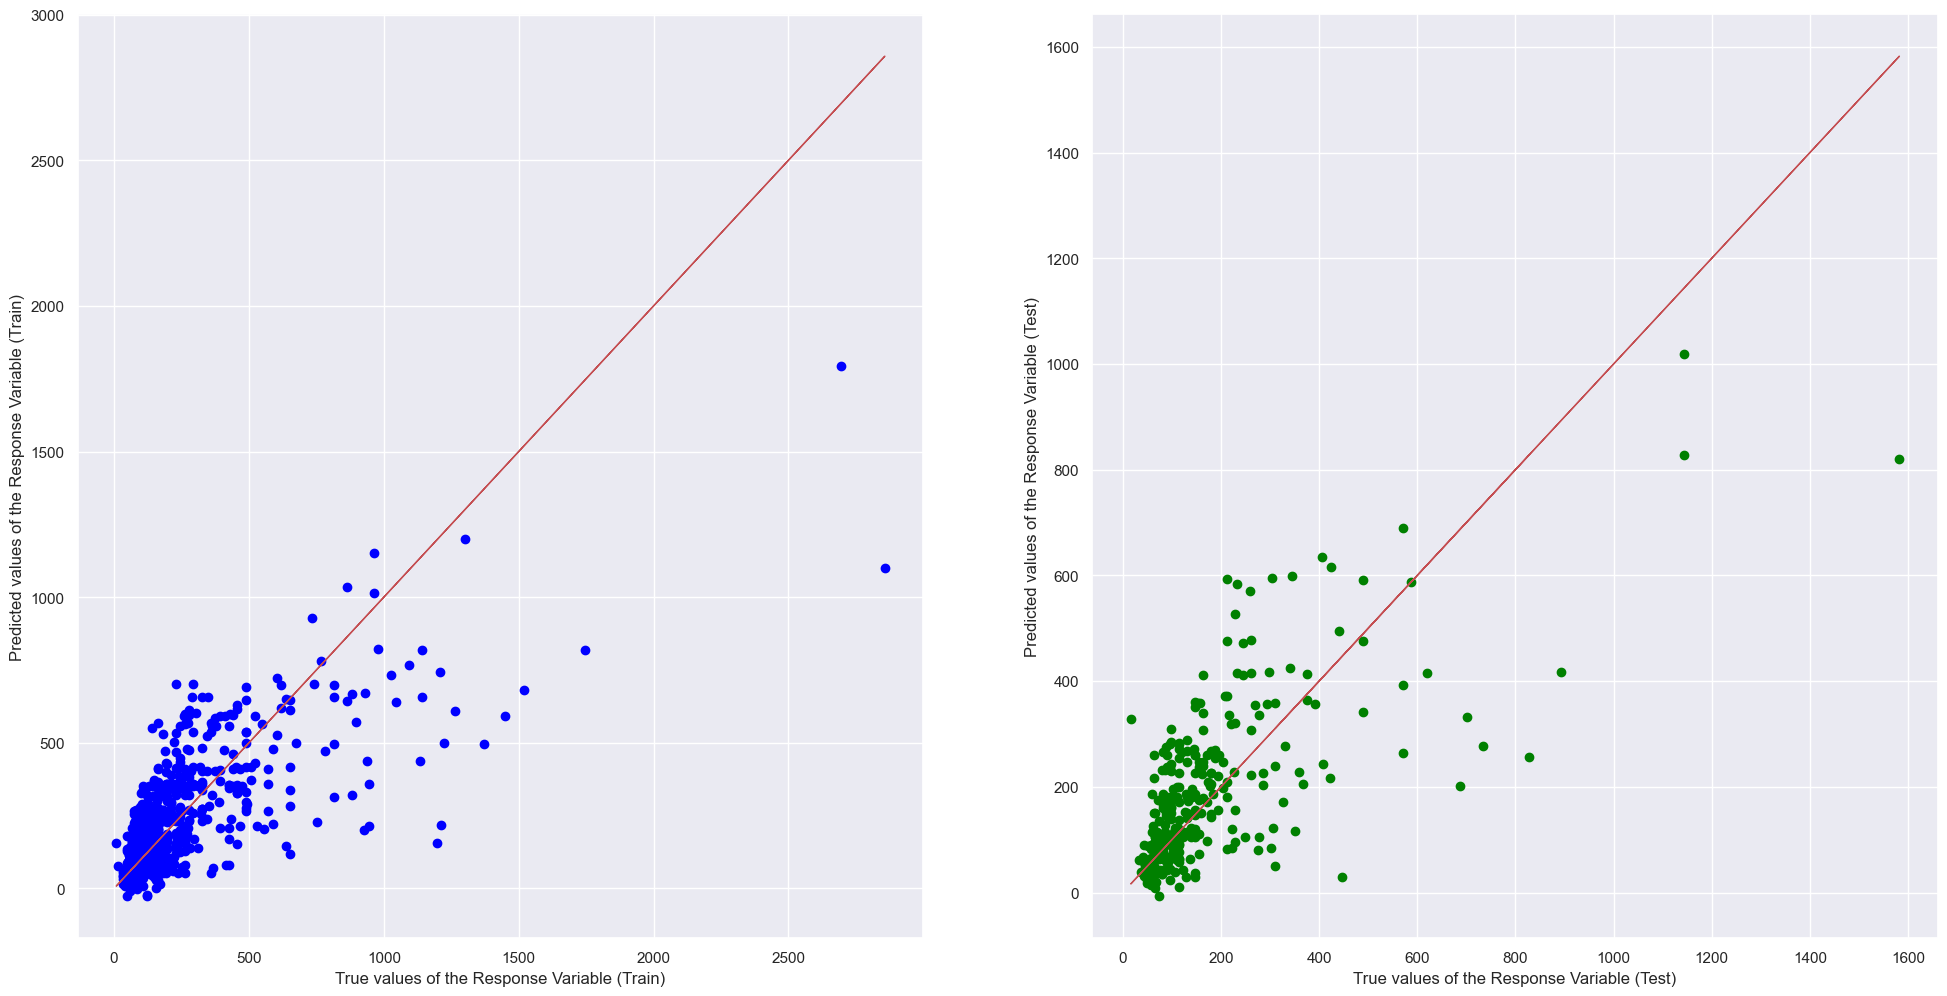

In [40]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

From the graph, it can be seen that the data points are all clustered at the bottom left. Hence log transformation can be done to make the distribution of the data points better and hence easier to interpret.

### Goodness of Fit of Regression

In [41]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset \t\tBaseline model train data")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train), "\t\t", r2_train_baseline)
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred), "\t\t", variance_train_str.split()[1])
print()

print()
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset \t\tBaseline model test data")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test), "\t\t", r2_test_baseline)
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred), "\t\t", variance_test_str.split()[1])



Goodness of Fit of Model 	Train Dataset 		Baseline model train data
Explained Variance (R^2) 	: 0.5610476911084984 		 0.0
Mean Squared Error (MSE) 	: 27078.285579494222 		 61688.445489



Goodness of Fit of Model 	Test Dataset 		Baseline model test data
Explained Variance (R^2) 	: 0.4326620213913185 		 0.0
Mean Squared Error (MSE) 	: 17256.86023099902 		 30417.248416


#### Evaluating model using Explained Variance:
For both the train and test datasets, the model outperforms the baseline model in terms of Explained Variance score. This indicates that the model explains a significant proportion of the variance in the target variable compared to the baseline model, which does not explain any variance beyond the mean. However, the Explained Variance values of the model suggest that there is still room for improvement, as they are not close to 1.0, indicating that the model's performance is not perfect.

#### Evaluating model using MSE:
The model achieves a lower MSE compared to the baseline model for both the train and test datasets. This means that the model's predictions have smaller errors compared to the baseline model, indicating better predictive performance. However, the MSE values for the model suggest that there is still some error in the predictions that could be reduced further.

Overall, the model performs better than the baseline model in terms of both explained variance and mean squared error (MSE), but there is still room for improvement in terms of predictive accuracy. 

##### Since the data is known to be positive(right) skewed, we will attempt to use log transformation to improve the data

# -----------------------------------------------------------------------------------------


## Model 2: Linear regression with log transformation

In [42]:
#log transform response
y_log_train = pd.DataFrame() #place holder with empty dataframe
y_log_test = pd.DataFrame() #place holder with empty dataframe
y_log_train["price_log"]= np.log(y_train["price"]) #log transforming train response variable 
y_log_test["price_log"]= np.log(y_test["price"]) #log transforming test response variable

In [43]:
linreg_log=LinearRegression()
linreg_log.fit(X_train, y_log_train)


LinearRegression()

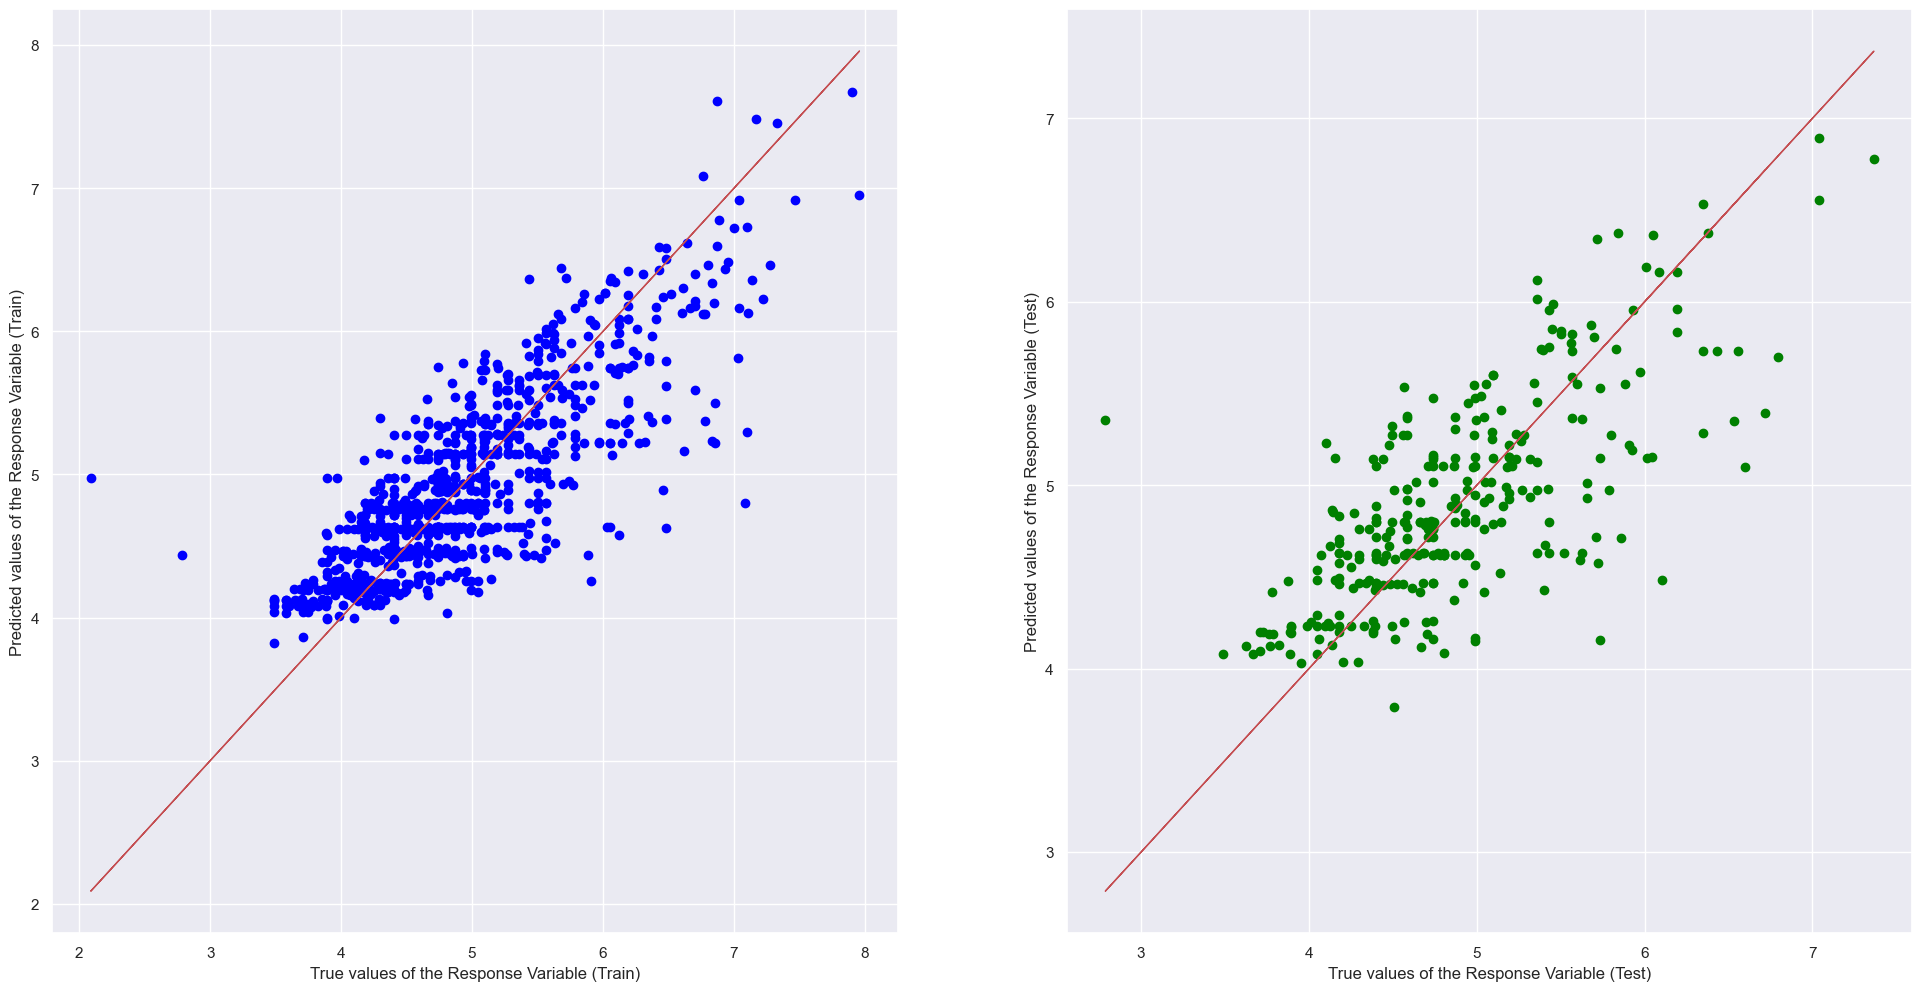

In [44]:

y_log_train_pred = linreg_log.predict(X_train)
y_log_test_pred = linreg_log.predict(X_test)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_log_train, y_log_train_pred, color = "blue")
axes[0].plot(y_log_train, y_log_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_log_test, y_log_test_pred, color = "green")
axes[1].plot(y_log_test, y_log_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


Here it can be seen that the data points are clearly distributed better than without log transformation. The closer the line is to more datapoints, the more accurate the prediction of the regression equation.

### Goodness of Fit of Regression

In [45]:

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset(log) \t\tTrain Dataset  \t\tBaseline model train data")
print("Explained Variance (R^2) \t:", linreg_log.score(X_train, y_log_train), "\t\t",linreg.score(X_train, y_train),"\t\t", r2_train_baseline)
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_log_train, y_log_train_pred), "\t\t",mean_squared_error(y_train, y_train_pred), "\t\t", variance_train_str.split()[1])
print()

print()
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset(log) \t\tTest Dataset \t\tBaseline model test data")
print("Explained Variance (R^2) \t:", linreg_log.score(X_test, y_log_test), "\t\t", linreg.score(X_test, y_test), "\t\t", r2_test_baseline)
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_log_test, y_log_test_pred), "\t\t", mean_squared_error(y_test, y_test_pred), "\t\t", variance_test_str.split()[1])



Goodness of Fit of Model 	Train Dataset(log) 		Train Dataset  		Baseline model train data
Explained Variance (R^2) 	: 0.6618140031951154 		 0.5610476911084984 		 0.0
Mean Squared Error (MSE) 	: 0.20951735916563113 		 27078.285579494222 		 61688.445489



Goodness of Fit of Model 	Test Dataset(log) 		Test Dataset 		Baseline model test data
Explained Variance (R^2) 	: 0.5029545326693874 		 0.4326620213913185 		 0.0
Mean Squared Error (MSE) 	: 0.235742352187335 		 17256.86023099902 		 30417.248416


From this it can be seen that the log transformation increases the explained variance for both the train and test data set. However, the MSE cannot be compared directly as the scale is different due to the log transformation.

# -----------------------------------------------------------------------------------------


## Model 3: Decision Tree Regressor

In [46]:
# Decision Tree using Train Data
dectree_regressor = DecisionTreeRegressor(max_depth=3)
dectree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

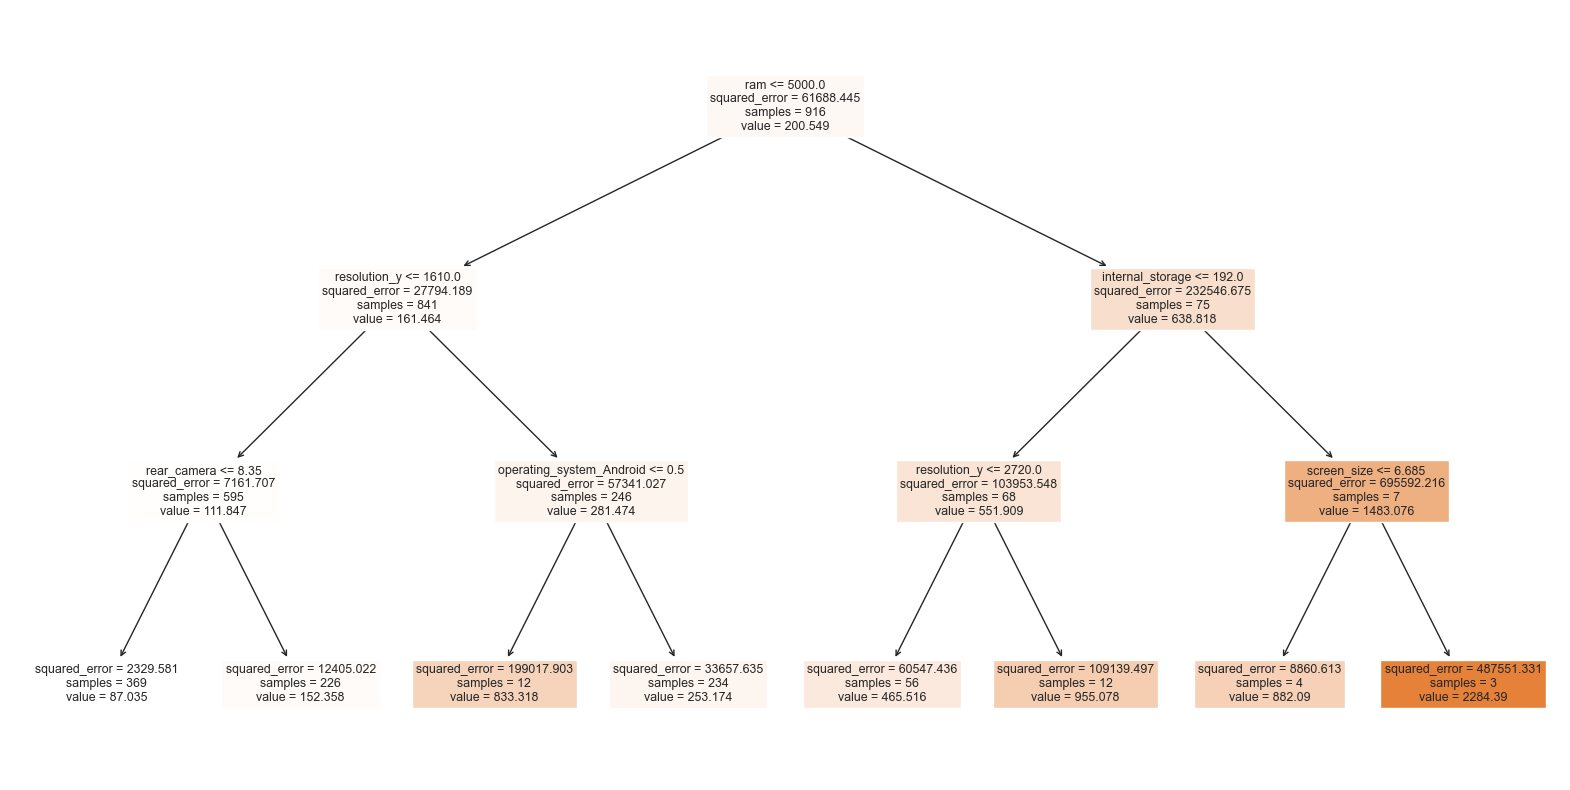

In [47]:
# Plot the decision tree regressor
plt.figure(figsize=(20, 10))
plot_tree(dectree_regressor, filled=True, feature_names=list(X_train.columns))
plt.show()

### Goodness of Fit of Regression

In [48]:
y_dtr_train_pred = dectree_regressor.predict(X_train) 
y_dtr_test_pred = dectree_regressor.predict(X_test)

In [49]:




#Train accuracy
train_mse_dtr = mean_squared_error(y_train, y_dtr_train_pred)
train_r2_dtr = r2_score(y_train, y_dtr_train_pred)

print("Goodness of Fit of Model \tTrain Data(DTR) \t\tTrain Data(log) \tBaseline model train data")
print("Explained Variance (R^2) \t:", train_r2_dtr, "\t\t",linreg_log.score(X_train, y_log_train), "\t\t", r2_train_baseline)
print("Mean Squared Error (MSE) \t:",train_mse_dtr,"\t\t", mean_squared_error(y_log_train, y_log_train_pred), "\t\t", variance_train_str.split()[1])



Goodness of Fit of Model 	Train Data(DTR) 		Train Data(log) 	Baseline model train data
Explained Variance (R^2) 	: 0.6438350043397036 		 0.6618140031951154 		 0.0
Mean Squared Error (MSE) 	: 21971.26492001816 		 0.20951735916563113 		 61688.445489


In [50]:
#Test accuracy
test_mse_dtr = mean_squared_error(y_test, y_dtr_test_pred)
test_r2_dtr = r2_score(y_test, y_dtr_test_pred)

print("Goodness of Fit of Model \tTest Dataset(DTR) \t\tTest Dataset(log) \tBaseline model test data")
print("Explained Variance (R^2) \t:", test_r2_dtr, "\t\t",linreg_log.score(X_test, y_log_test), "\t\t", r2_test_baseline)
print("Mean Squared Error (MSE) \t:",test_mse_dtr,"\t\t", mean_squared_error(y_log_test, y_log_test_pred), "\t\t", variance_test_str.split()[1])



Goodness of Fit of Model 	Test Dataset(DTR) 		Test Dataset(log) 	Baseline model test data
Explained Variance (R^2) 	: 0.4397185823895955 		 0.5029545326693874 		 0.0
Mean Squared Error (MSE) 	: 17042.21906215392 		 0.235742352187335 		 30417.248416


 The Decision Tree Regressor Model is another regression model that is similar to the Linear Regression Model. It behaves similarly to a Decision Tree Classification Model, and it helps to provide a clear and interpretable structure, which makes it easy to understand how predictions are made. For example, a user can simply follow the criterias starting from the parent node, where if the mobile phone has a RAM of >5000Mb, Internal Storage of >192GB, and Screen Size of >6.685 inches, it is predicted to have a price of $2284.49

In terms of its accuracy, it has an R^2 and MSE that is similar to the Linear Regression Model without log, indicating that it performs just as well. This indicates that both models can both be utilised to achieve similar results, and the choice depends on the nature and properties of the dataset, and also the user's objective. A Decision Tree Regressor Model would be more interpretable and is able to capture non-linear relationships between features and the target variable without requiring explicit transformations. Thus, a Decision Tree Regressor Model should be chosen in the case where there are non-linear relationships between variables and the target response in the dataset. Furthermore, if the user wants the model to be more interpretable and show the steps that leads to the prediction, this model should be preferred over the Linear Regression Model.


# -----------------------------------------------------------------------------------------


# Type 2: Classification model
We then implemented classification models as well. While the regression models can produce a continuous estimate, the spread of data may cause it to be inaccurate. By using a classification model, we may be able to get a more accurate prediction despite it being class-based.

## Model 4: Decision Tree 

In [51]:
# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_cat_train)

# Make predictions
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

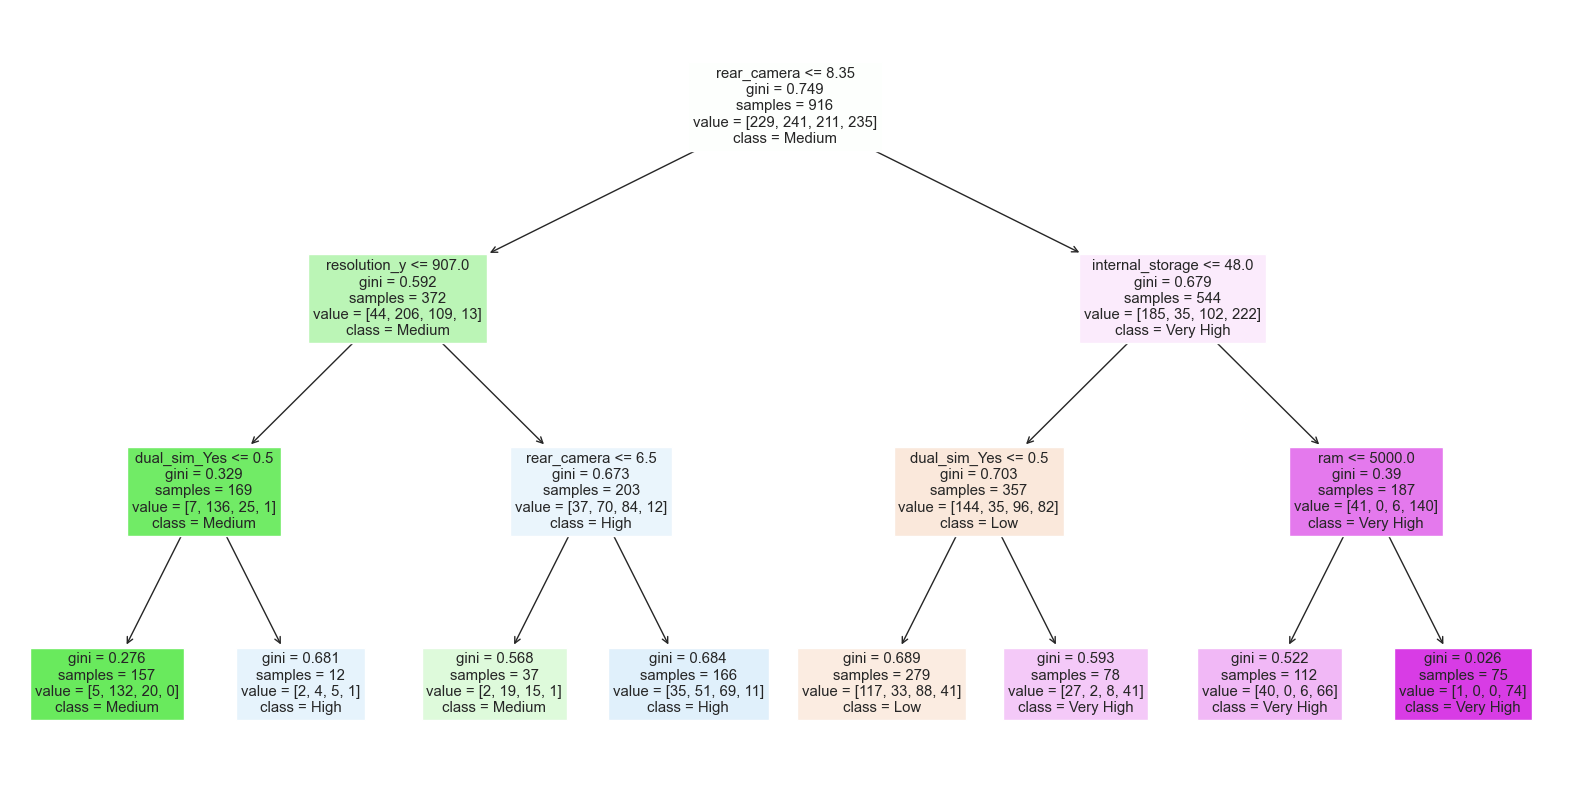

In [52]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=list(X_train.columns), class_names=['Low', 'Medium', 'High', 'Very High'])
plt.show()

### Accuracy of Model

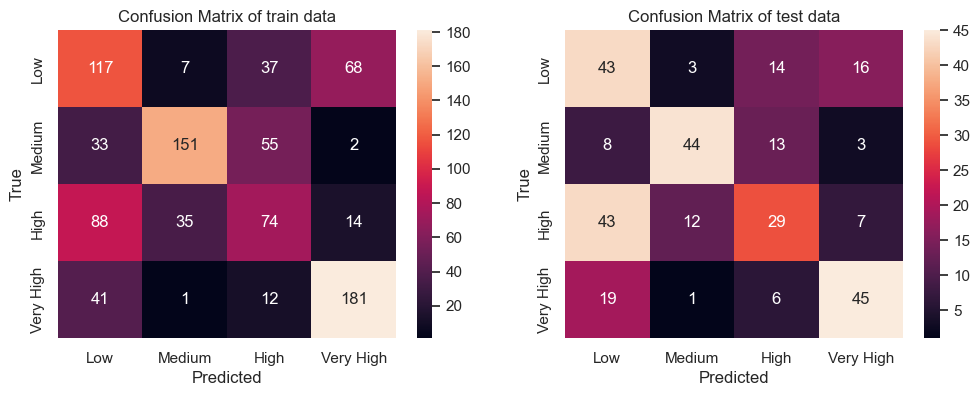

In [53]:
#get confusion matrix from test and train
cm_train_dt = confusion_matrix(y_cat_train, y_dt_train_pred)
cm_test_dt = confusion_matrix(y_cat_test, y_dt_test_pred)
label_names = ['Low', 'Medium', 'High', 'Very High']


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for train data
sb.heatmap(cm_train_dt, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix of train data')

# Plot confusion matrix for test data
sb.heatmap(cm_test_dt, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix of test data')

plt.show()

In [54]:
# Evaluate the model
dt_accuracy_train = accuracy_score(y_cat_train, y_dt_train_pred)
print("Accuracy of model on train data:",dt_accuracy_train )
dt_accuracy_test = accuracy_score(y_cat_test, y_dt_test_pred)
print("Accuracy of model on test data:",dt_accuracy_test )

Accuracy of model on train data: 0.5709606986899564
Accuracy of model on test data: 0.5261437908496732


In both train and test data, the models' accuracies are above 50%. From the confusion matrix, we can observe that in the test data 26 samples out of the 71 samples were wrongly predicted as very high, 33 out of the 62 samples were wrongly predicted as high, only 16 out of 60 sample are wrongly predicted as medium and 70 out of 113 samples are wrongly predicted as low. Hence when predicting phone prices, it is likely that phones from other price categories will be wrongly categorised into low as it has the lowest True positive rate at 38%

we can try to find the best depth for decision tree using gridsearchCV

### Using GridSearchCV to evaluate the best model of decision tree

In [55]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid_dt = {'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid_dt = GridSearchCV(DecisionTreeClassifier(),   # the model family
                      param_grid_dt,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid_dt.fit(X_train, y_cat_train.cat_price)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [56]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid_dt.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid_dt.best_score_))

DecisionTreeClassifier(max_depth=5)
0.5633523402233309


Hence the depth that gives highest accuracy is 6

### Decision Tree with the optimised hyper-parameters: max_depth=6

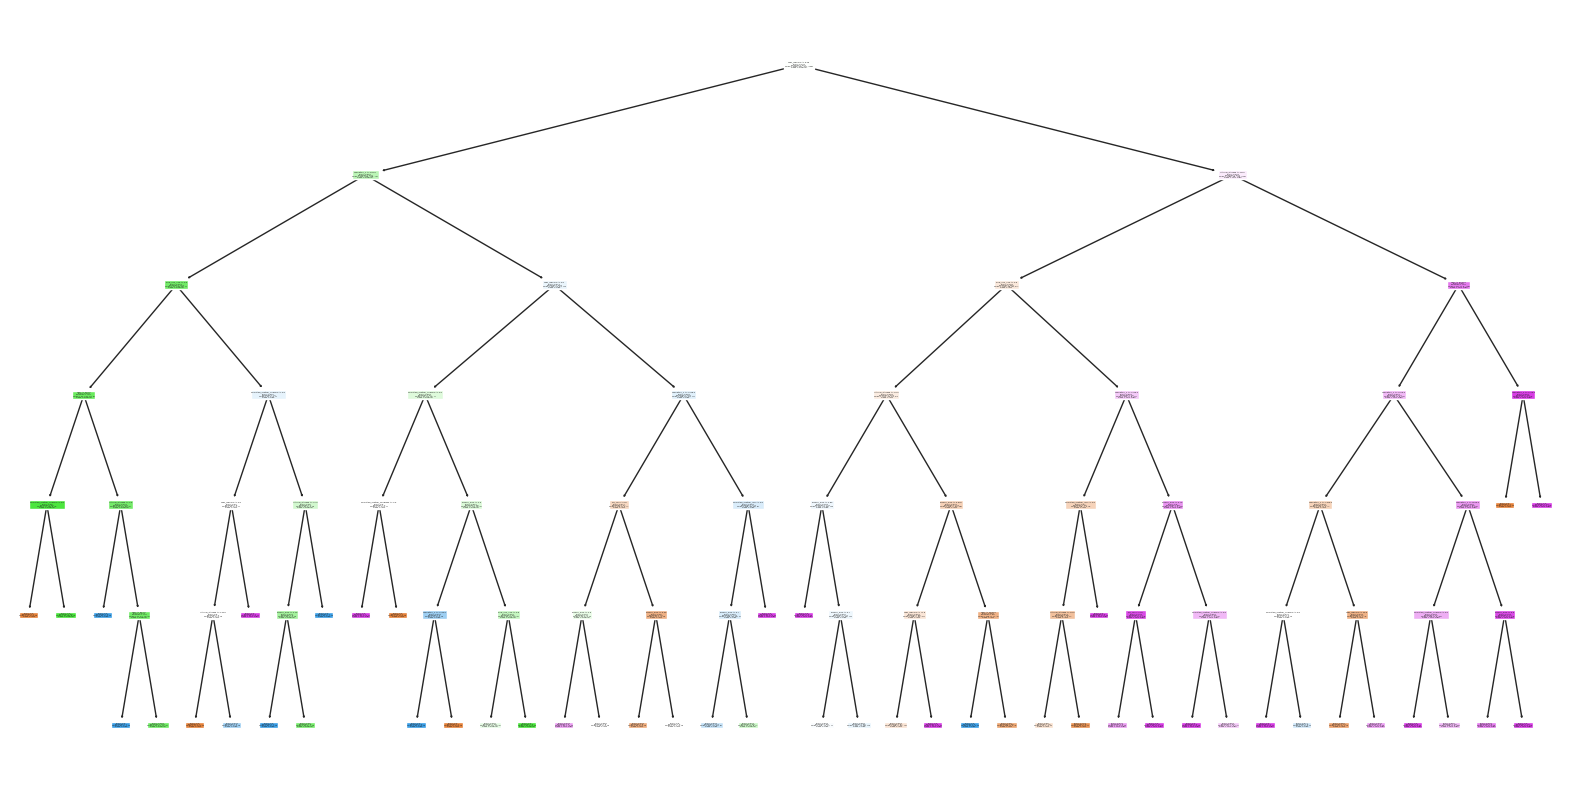

In [57]:
# Initialize and train the decision tree classifier
dt_improved = DecisionTreeClassifier(max_depth=6)
dt_improved.fit(X_train, y_cat_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_improved, filled=True, feature_names=list(X_train.columns), class_names=['Low', 'Medium', 'High', 'Very High'])
plt.show()


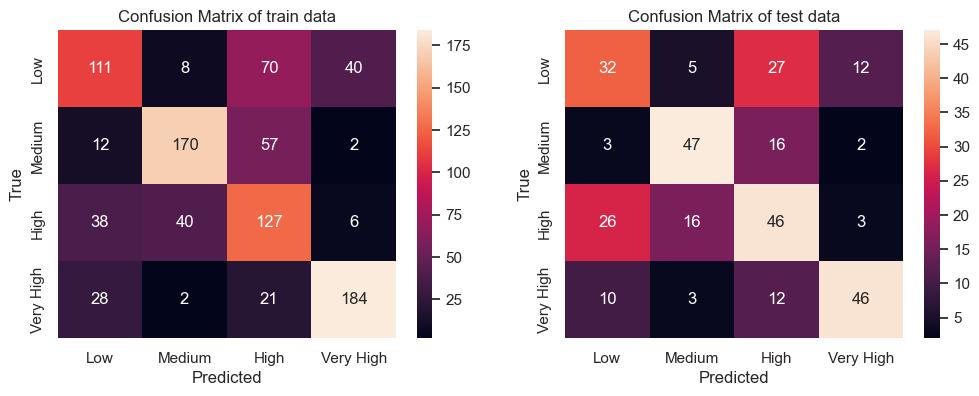

In [58]:
# Make predictions
y_improved_dt_train_pred = dt_improved.predict(X_train)
y_improved_dt_test_pred = dt_improved.predict(X_test)

#get confusion matrix from test and train
cm_train_dt_improved = confusion_matrix(y_cat_train, y_improved_dt_train_pred)
cm_test_dt_improved = confusion_matrix(y_cat_test, y_improved_dt_test_pred)
label_names = ['Low', 'Medium', 'High', 'Very High']


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for train data
sb.heatmap(cm_train_dt_improved, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix of train data')

# Plot confusion matrix for test data
sb.heatmap(cm_test_dt_improved, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix of test data')

plt.show()


### Accuracy of Model

In [59]:
# Evaluate the model
dt_improved_accuracy_train = accuracy_score(y_cat_train, y_improved_dt_train_pred)
print("Accuracy of model with depth 6 on train data:",dt_improved_accuracy_train )
dt_improved_accuracy_test = accuracy_score(y_cat_test, y_improved_dt_test_pred)
print("Accuracy of model with depth 6 test data:",dt_improved_accuracy_test )

Accuracy of model with depth 6 on train data: 0.6462882096069869
Accuracy of model with depth 6 test data: 0.5588235294117647


Evidently, the accuracy increased for both the train and test data with depth=6.

# -----------------------------------------------------------------------------------------


## Model 5: Random Forest
To improve upon this approach further, we decided to use a random forest classifier to enhance the robustness and accuracy of the classification prediction.

In [60]:
# Create the Random Forest object with depth =3 and number of trees =100
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 3)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_cat_train)

RandomForestClassifier(max_depth=3)

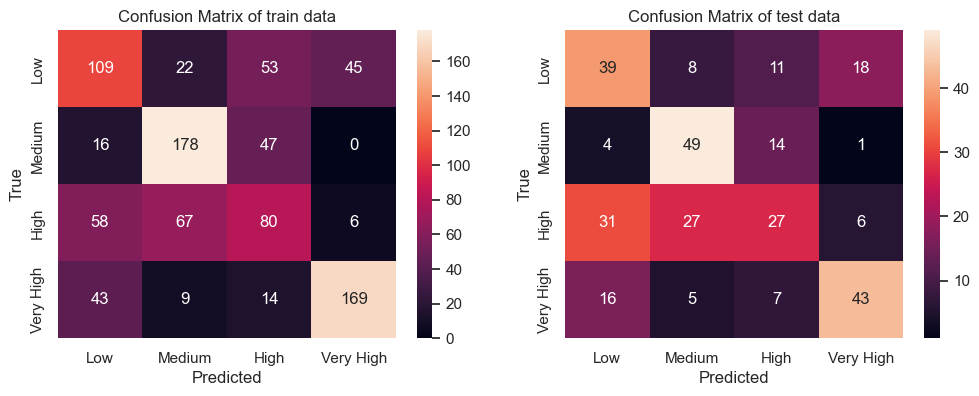

In [61]:
# Predict the Response corresponding to Predictors in train and test data
y_rf_train_pred = rforest.predict(X_train)
y_rf_test_pred = rforest.predict(X_test)

# get Confusion Matrix from train and test prediction and actual values
cm_train_rf = confusion_matrix(y_cat_train, y_rf_train_pred)
cm_test_rf = confusion_matrix(y_cat_test, y_rf_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for train data
sb.heatmap(cm_train_rf, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix of train data')

# Plot confusion matrix for test data
sb.heatmap(cm_test_rf, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix of test data')

plt.show()

### Accuracy of Model

In [62]:
# Print the Classification Accuracy for train and test data
print("Accuracy of model on train data:", rforest.score(X_train, y_cat_train))
print() 

print("Accuracy of model on test data:", rforest.score(X_test, y_cat_test))
print()

Accuracy of model on train data: 0.5851528384279476

Accuracy of model on test data: 0.5163398692810458



In both train and test data, the models' accuracies are above 50%. We can apply the same analysis for the confusion matrix of the decision tree to the random forest. Again, we will use GridSearchCV to find the best model.

### Using GridSearchCV to evaluate the best model of random forest

In [63]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid_rf = {'n_estimators': np.arange(100,400,50),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid_rf = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid_rf,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid_rf.fit(X_train, y_cat_train.cat_price)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350])},
             scoring='accuracy')

In [64]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid_rf.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid_rf.best_score_))

RandomForestClassifier(max_depth=5, n_estimators=250)
0.5775362318840579


### Random Forest using the optimised hyper-parameters: n_estimators=250 and max_depth=5

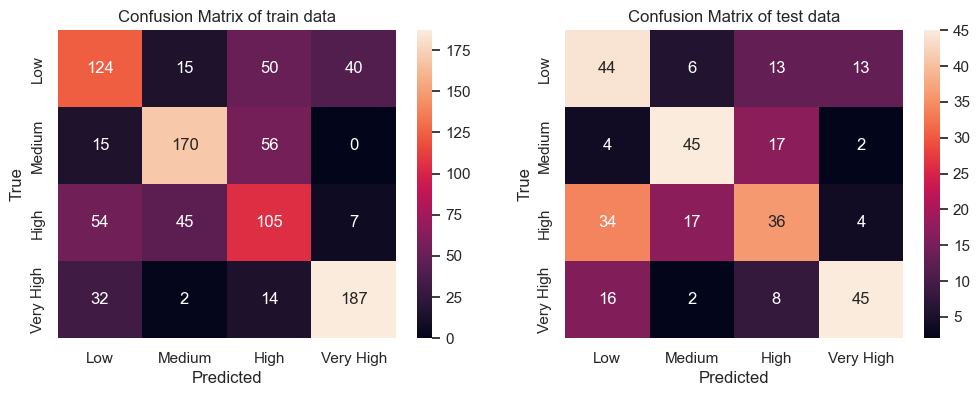

In [65]:
# Create the Random Forest object
rforest_improved = RandomForestClassifier(n_estimators = 250,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest_improved.fit(X_train, y_cat_train)


# Predict the Response corresponding to Predictors in train and test data
y_rf_improved_train_pred = rforest_improved.predict(X_train)
y_rf_improved_test_pred = rforest_improved.predict(X_test)

# get Confusion Matrix from train and test prediction and actual values
cm_train_rf_improved = confusion_matrix(y_cat_train, y_rf_improved_train_pred)
cm_test_rf_improved = confusion_matrix(y_cat_test, y_rf_improved_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for train data
sb.heatmap(cm_train_rf_improved, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix of train data')

# Plot confusion matrix for test data
sb.heatmap(cm_test_rf_improved, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix of test data')

plt.show()

### Accuracy of Model

In [66]:
# Print the Classification Accuracy for train and test data
print("Accuracy of optimised model on train data:", rforest_improved.score(X_train, y_cat_train))
print() 

print("Accuracy of optimised model on test data:", rforest_improved.score(X_test, y_cat_test))
print()

Accuracy of optimised model on train data: 0.6397379912663755

Accuracy of optimised model on test data: 0.5555555555555556



Accuracy indeed increased for the new model with depth= 5 number of tree = 250 on both the train and test data

# -----------------------------------------------------------------------------------------


# -----------------------------------------------------------------------------------------


# Overall Model Evaluation

## Choosing The Best Numerical Prediction Model
Amongst Linear Regression, Linear Regression with log transformation and Decision Tree Regressor for numerical prediction of the response variable `price`

In the context of our project, we the Regression Model is able to account for each of the specific values of each feature in the mobile phone when predicting the price. While the Decision Tree Regressor Model may be more interpretable, the price it is able to predict is limited. On the other hand, the Linear Regression Model can be made more accurate through log transformation. Thus, the Linear Regression with log will be the most optimal.

## Choosing The Best Categorical Prediction Model
Between Decision Tree and Random Forest for categorical prediction of response variable `Price`

The accuracy for the Random Forest Model with optimal hyper-parameter is similar to that of the Decision Tree with optimal hyper-parameter. However, since it takes a shorter time to run, for our project, the Decision Tree Model is the better option. This may change on a separate run since Random Forests accuracy changes based on each individual run due to the random nature of its operation when it picks out data points for the different trees. This may also not be the best model for different data sets.